In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

(histograms)=
# Sampling Estimates of the Probability Density via Histograms

As in the previous section, consider a random variable $X$ and a function of $X$, $Y=g(X)$.
We wish to approximate the probability density $p(y)$ of $Y=g(X)$ from samples.
We start by splitting the domain of $y$ into $M$ small bins.
Assume these bins have bounds $b_0, b_1, \dots, b_M$.
That is, the first bin is $[b_0,b_1]$, the second one is $[b_1,b_2]$, etc.
We will approximate $p(y)$ with a constant inside each bin.
That is, the approximation is:

$$
\hat{p}_M(y) = \sum_{j=1}^Mc_j 1_{[b_{j-1}, b_j]}(y),
$$

where the $c_j$'s are constants to be determined.
This is a piecewise constant approximation of $p(y)$ and is called a *histogram*.

How do we determine the constants $c_j$?
Each one of these constants is the probability that a sample of $Y$ falls inside the bin, i.e.,

$$
c_j = p(b_{j-1}\le Y \le b_j).
$$

Of course, we can write this probability as 

$$
c_j = F(b_j) - F(b_{j-1}),
$$

where $F(y)$ is the CDF of $Y$.
Therefore, we can approximate the constants using our estimate of the CDF.
In the notation of the previous section, we have that:

$$
\bar{c}_{j,N} := \bar{F}_N(b_j) - \bar{F}_N(b_{j-1}).
$$

Of course, this is nothing more but:

$$
\bar{c}_{j,N} = \frac{\text{number of samples that fall in bin }[b_{j-1},b_j]}{N}
$$

Putting everything together, our estimate for the PDF $p(y)$ is:

$$
\hat{p}_{M,N}(y) = \sum_{j=1}^M\bar{c}_{j,N} 1_{[b_{j-1}, b_j]}(y),
$$

which does converge to $p(y)$ (in some sense) as both $N$ and $M$ go to infinity.

## Example: 1D CDF
We will continue using the 1D test function of Example 3.4 {cite}`robert_monte_2004`.
Assume that $X\sim\mathcal{U}([0,1])$ and pick:

$$
g(x) = \left(\cos(50x) + \sin(20x)\right)^2.
$$

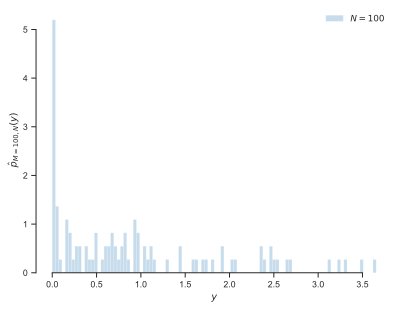

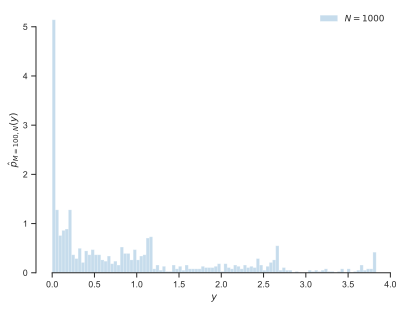

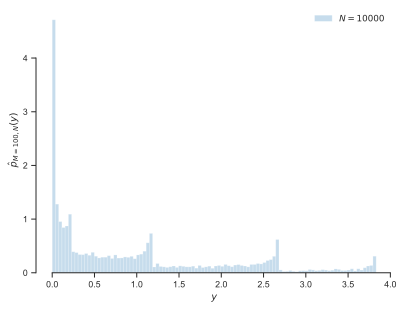

In [2]:
import numpy as np
# define the function here:
g = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

# Again, we do not need to write any code for the histogram
# It's already implemented in several packages.
# We will use the matplotlib implementation

# Maximum number of samples to take
max_n = 10000 
# The number of bins
num_bins = 100
# Generate samples from X
x_samples = np.random.rand(max_n)
# Get the corresponding Y's
y_samples = g(x_samples)

# Make the plot
for N in [100, 1000, max_n]:
    fig, ax = plt.subplots()
    ax.hist(
        y_samples[:N],
        label=f"$N={N:d}$",
        bins=num_bins,
        density=True,
        alpha=0.25
    )
    ax.set_xlabel(r"$y$")
    ax.set_ylabel(r"$\hat{{p}}_{{M={0:d},N}}(y)$".format(num_bins))
    plt.legend(loc="best", frameon=False)
    sns.despine(trim=True);

## Questions 

+ Experiment with the number of bins $M$. Repeat the code above with $M=5, 10$, and $1000$. What do you observe? What happens when you have too few bins? What happens when you have too many bins? You should pick the number of bins and $N$ together. As a rule, $N$ should be about ten times $M$. For a given choice of $M$, it is possible to pick how many $N$'s you need using what we will learn in lecture 10.